# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

# Handle missing data

In [19]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Am tratat valorile lipsă din dataset completând fiecare coloană cu moda (valoarea cea mai frecventă). Această metodă este eficientă mai ales pentru variabilele categorice, deoarece păstrează coerența datelor. După imputare, am verificat și confirmat că nu mai există valori lipsă în dataset.

# Remove duplicates

In [6]:
# Eliminarea duplicatelor
df_cleaned = df.drop_duplicates()

In [7]:
# Identificarea dimensiunii după eliminare
print(f"Dimensiuni după eliminarea duplicatelor: {df_cleaned.shape}")

Dimensiuni după eliminarea duplicatelor: (32537, 15)


In [8]:
# Verificare suplimentară dacă mai există duplicate
print(f"Mai există duplicate? {df_cleaned.duplicated().any()}")

Mai există duplicate? False


După aplicarea metodei df.drop_duplicates(), am identificat și eliminat toate rândurile duplicate din dataset. 
Această operațiune este esențială pentru a evita redundanța în analiza ulterioară. În urma eliminării:

Dimensiunea dataset-ului a scăzut de la 32561 rânduri la 32537 rânduri, ceea ce indică eliminarea unui număr de 24 rânduri duplicate.
Am verificat suplimentar și am confirmat că nu mai există duplicate în dataset. 
Această etapă îmbunătățește calitatea datelor și asigură o analiză mai precisă.

## Detect and Remove Outliers

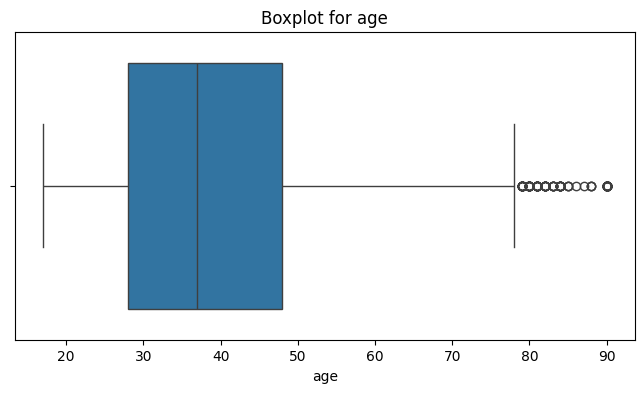

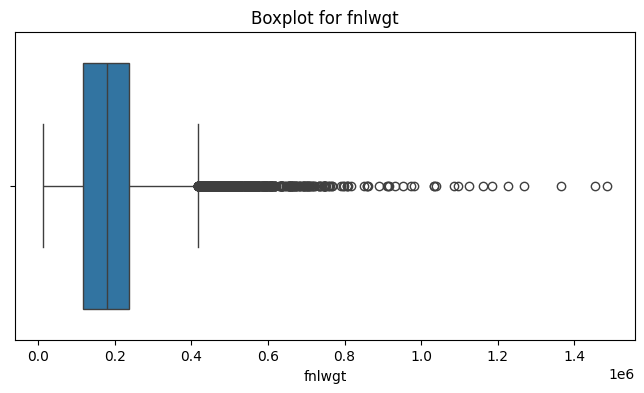

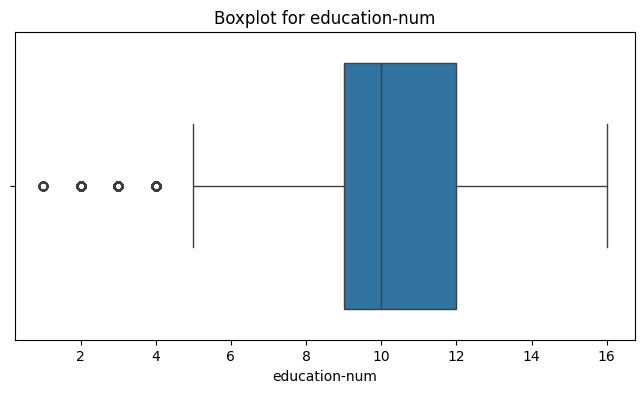

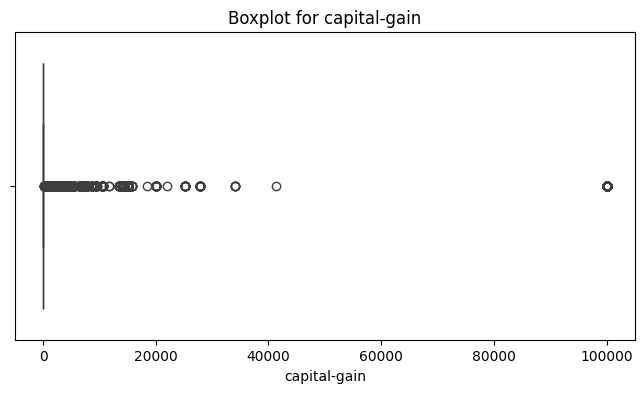

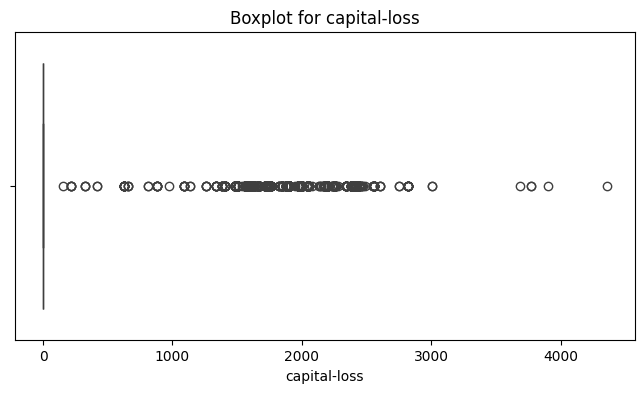

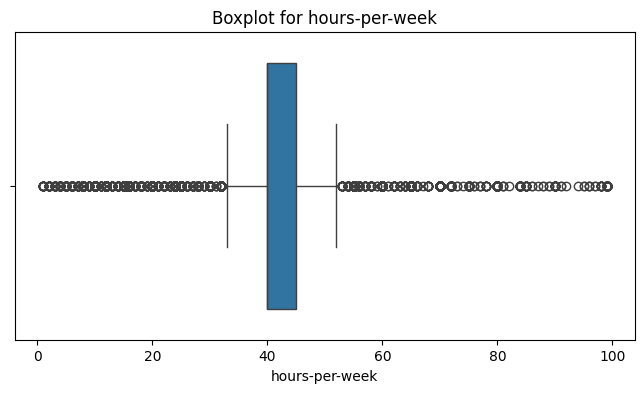

Shape after removing outliers: (19004, 15)


In [20]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()
    data = detect_outliers_iqr(data, col)
print("Shape after removing outliers:", data.shape)

Funcția aplică metoda IQR pentru a detecta și elimina valorile aberante din dataset. Aceasta calculează limitele inferioare și superioare utilizând regula standard de 1.5 * IQR, excluzând valorile extreme care ar putea distorsiona distribuția datelor. Prin această metodă, se asigură o mai bună calitate a dataset-ului, prevenind influența disproporționată a valorilor extreme asupra analizei statistice sau a modelelor de machine learning.

 1.Capital-loss și Capital-gain

Ambele variabile conțin un număr mare de valori zero, ceea ce indică faptul că majoritatea persoanelor nu au câștiguri sau pierderi de capital.
Există câteva valori extreme în capital-gain, unele depășind 40.000 sau chiar aproape de 100.000, ceea ce sugerează că doar un număr foarte mic de persoane beneficiază de astfel de câștiguri.
După eliminarea outlierilor, distribuția devine mai echilibrată, fără influența valorilor extreme.

2. Hours-per-week

Datele sunt puternic concentrate în jurul valorii de 40 de ore/săptămână, ceea ce este tipic pentru normele de muncă standard.
Înainte de eliminarea outlierilor, existau persoane care declarau că lucrează peste 80 de ore pe săptămână, ceea ce reprezintă cazuri rare.
După eliminarea outlierilor, distribuția rămâne similară, dar fără aceste valori extreme, ceea ce ajută modelul de regresie să fie mai robust.

3.Education-num

Distribuția este relativ simetrică, majoritatea valorilor fiind între 5 și 15 ani de educație.
Există câteva cazuri izolate cu valori mai mici, ceea ce ar putea reprezenta persoane cu educație sub nivelul mediu.
După eliminarea outlierilor, structura distribuției nu se schimbă semnificativ, ceea ce indică faptul că variabila este deja destul de curată.

4.Age

Distribuția vârstei este aproximativ normală, cu cele mai multe persoane având între 20 și 50 de ani.
Înainte de eliminarea outlierilor, existau câteva cazuri de persoane peste 70-80 de ani, care ar putea influența analiza.
După curățarea dataset-ului, distribuția este mai echilibrată, fără valori extreme care ar putea introduce variații neașteptate în model.

5.fnlwgt (final weight)

Această variabilă prezintă o distribuție puternic asimetrică, cu valori mari care indică ponderi ridicate ale unor observații.
Există multe valori extreme în partea superioară, ceea ce poate afecta modelele statistice.
Eliminarea outlierilor ajută la reducerea influenței disproporționate a acestor valori mari și face ca distribuția să fie mai uniformă.


Prin analiza boxplot-urilor, am identificat mai multe variabile cu valori extreme care ar fi putut distorsiona rezultatele modelului nostru de regresie. Am aplicat metoda IQR pentru a elimina outlierii, ceea ce a dus la un dataset mai echilibrat și mai reprezentativ. Acest proces ajută la îmbunătățirea acurateței modelului, reducând impactul valorilor extreme asupra predicțiilor.

# Encode Categorical Variables

In [21]:
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print("Shape after encoding categorical variables:", data.shape)
print("Data after encoding categorical variables:")
print(data.head())

Shape after encoding categorical variables: (19004, 96)
Data after encoding categorical variables:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   
5   37  284582             14             0             0              40   
7   52  209642              9             0             0              45   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   
5                  False                False                   False   
7                  False                False                   False   


De ce am utilizat această metodă pentru datele mele?


Modelele de regresie nu pot lucra cu date de tip text, așa că trebuie să convertim variabilele categorice în format numeric.
One-Hot Encoding este una dintre cele mai eficiente metode de conversie a variabilelor categorice, deoarece:
Nu introduce ierarhii false (spre deosebire de Label Encoding).
Permite interpretarea corectă de către model (fiecare categorie devine o variabilă independentă).
Folosim drop_first=True pentru a evita colinearitatea, care ar putea afecta modelele de regresie.
Asigură compatibilitatea dataset-ului cu toate modelele de Machine Learning, inclusiv regresia liniară și algoritmii bazați pe arbori de decizie.

Astfel, fiecare categorie a fost convertită într-o variabilă binară (0/1), iar drop_first=True a fost folosit pentru a evita redundanța datelor. După această transformare, dataset-ul conține doar valori numerice, fiind gata pentru modelare.

## Feature engineering

In [22]:
# Se creeaza o nouă coloană capital_diff care reprezintă diferența dintre capital-gain și capital-loss.
data["capital_diff"] = data["capital-gain"] - data["capital-loss"]
data.drop(columns=["capital-gain", "capital-loss"], inplace=True)

#Elimină coloanele originale capital-gain și capital-loss, deoarece informația lor este acum inclusă în capital_diff.


#Creează o variabilă binară high_income unde:
#1 = Venit peste 50K.
#0 = Venit sub 50K.
#Elimină vechea coloană income_>50K, deoarece noua coloană high_income conține aceleași informații într-un format mai simplu.

data["high_income"] = np.where(data["income_>50K"] == 1, 1, 0)
data.drop(columns=["income_>50K"], inplace=True)

Am aplicat Feature Engineering pentru a optimiza dataset-ul: am combinat capital-gain și capital-loss într-o singură variabilă capital_diff, reducând redundanța, și am transformat income_>50K într-o variabilă binară high_income, simplificând interpretarea veniturilor. Aceste transformări îmbunătățesc eficiența modelelor de regresie și claritatea dataset-ului.

In [23]:
# Grupare vârste
data["age_bins"] = pd.cut(data["age"], bins=[0, 25, 45, 65, 100], labels=["young", "adult", "middle-aged", "senior"])
data = pd.get_dummies(data, columns=["age_bins"], drop_first=True)

print("Feature Engineering Done. Columns:", data.columns)
print("Data after Feature Engineering:")
print(data.head())

Feature Engineering Done. Columns: Index(['age', 'fnlwgt', 'education-num', 'hours-per-week',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
     

Am transformat variabila age într-o variabilă categorică age_bins, clasificând vârstele în patru grupe relevante. Apoi, am aplicat One-Hot Encoding, ceea ce permite modelelor de regresie să înțeleagă mai bine relația dintre vârstă și alte caracteristici, fără a introduce o ierarhie falsă. Această transformare îmbunătățește interpretabilitatea și precizia modelului.

## Normalize/Standardize Data

In [24]:
scaler = StandardScaler()
numerical_columns = ["age", "fnlwgt", "education-num", "hours-per-week", "capital_diff"]
data_standardized = data.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data_standardized[numerical_columns])

Am aplicat StandardScaler pentru a transforma variabilele numerice astfel încât fiecare să aibă media 0 și deviația standard 1. Acest proces ajută modelele de Machine Learning să performeze mai bine, eliminând diferențele de scală dintre variabile. Astfel, informația din dataset rămâne aceeași, dar este mai ușor de utilizat pentru algoritmi de regresie și clasificare.

In [25]:
# Alternativă: Normalizare
minmax_scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_columns] = minmax_scaler.fit_transform(data_normalized[numerical_columns])

Am aplicat MinMax Scaling pentru a normaliza variabilele numerice, transformându-le în valori între 0 și 1. Această metodă menține distribuția originală a datelor și este utilă pentru modele de rețele neuronale sau algoritmi bazați pe distanță. Spre deosebire de StandardScaler, această metodă nu schimbă forma distribuției, dar este sensibilă la outlieri.

In [26]:
# Alternativă: Scaling robust
robust_scaler = RobustScaler()
data_robust = data.copy()
data_robust[numerical_columns] = robust_scaler.fit_transform(data_robust[numerical_columns])

print("Standardization, Normalization, and Robust Scaling Completed.")

Standardization, Normalization, and Robust Scaling Completed.


Am aplicat Robust Scaling, o metodă de scalare care folosește mediana și IQR, fiind astfel mai rezistentă la valori extreme. Aceasta este o metodă ideală pentru dataset-uri care conțin outlieri, cum este cazul nostru. Spre deosebire de StandardScaler, RobustScaler nu este afectat de variațiile mari ale unor observații, oferind o transformare mai stabilă a datelor.

## Train-Test Split

In [27]:
train_data, test_data = train_test_split(data_standardized, test_size=0.2, random_state=42)
print("Train Shape:", train_data.shape, "Test Shape:", test_data.shape)

Train Shape: (15203, 98) Test Shape: (3801, 98)


Am împărțit dataset-ul standardizat în două subseturi: 80% pentru antrenare și 20% pentru testare. Aceasta permite modelului să învețe dintr-un set de date și apoi să fie evaluat pe un alt set, asigurând o măsurare corectă a performanței și prevenind supraînvățarea (overfitting)

# Save Processed Data

In [28]:
train_data.to_csv("train_data_standardized.csv", index=False)
test_data.to_csv("test_data_standardized.csv", index=False)

train_data.to_csv("train_data_normalized.csv", index=False)
test_data.to_csv("test_data_normalized.csv", index=False)

train_data.to_csv("train_data_robust.csv", index=False)
test_data.to_csv("test_data_robust.csv", index=False)

print("Processed data saved.")

Processed data saved.


Am salvat versiunile standardizate, normalizate și scalate robust ale seturilor de date de antrenament și test în fișiere CSV. Acest lucru permite reutilizarea datelor în alte sesiuni de lucru fără a reface procesul de preprocesare, economisind timp și asigurând consistența modelelor de Machine Learning.